In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import os
import matplotlib.pyplot as plt
from math import trunc

In [2]:
metrics = pd.read_csv('metrics_v4.csv', sep=';')

In [3]:
metrics

,modelName,MAP@10,nDCG@10,Recall@10,Precision@10,MRR@10,Novelty@10,Diversity@10,MAP@20,nDCG@20,Recall@20,Precision@20,MRR@20,Novelty@20,Diversity@20
0,MostPopular,0.008845,0.070085,0.068773,0.008664,0.032376,8.891236,1.000000,0.005235,0.082615,0.080866,0.005144,0.033319,8.891236,1.000000
1,Random,0.000903,0.003830,0.003430,0.000722,0.002758,7.167913,0.810148,0.000903,0.015257,0.013538,0.000817,0.001646,7.243560,0.794994
2,CDL,0.081600,0.097400,0.156200,0.015600,0.081400,7.524500,0.946650,0.075300,0.100400,0.187500,0.009400,0.075300,7.524590,0.928020
3,VBPR,0.006500,0.000000,0.000000,0.000000,0.005500,7.453847,0.823146,0.021100,0.037300,0.093800,0.004700,0.021100,7.035814,0.796022
4,LLaVA-KNN,0.005235,0.044837,0.044224,0.005054,0.029372,8.545793,0.781949,0.003520,0.059834,0.058363,0.003430,0.030457,8.574840,0.751805
5,BLIP-KNN,0.002166,0.017352,0.017148,0.001986,0.009281,8.509801,0.808303,0.001986,0.031094,0.030686,0.001895,0.010522,8.535249,0.775722
6,LightFM + LLaVA,0.005776,0.048441,0.047653,0.005596,0.026125,6.690929,0.938448,0.001895,0.027581,0.025632,0.001805,0.014967,7.506287,0.897383
7,LightFM,0.004513,0.037019,0.036823,0.004513,0.019765,6.805100,0.939531,0.003249,0.049460,0.049158,0.003159,0.023205,7.176193,0.896570


In [4]:
models_and_metrics = {}
models = metrics['modelName']
metrics_for_reclist_10 = metrics.columns[1:8]
metrics_for_reclist_20 = metrics.columns[8:]

for model in models: 
    model_row = metrics[metrics['modelName'] == model]
    model_metrics_10 = model_row[metrics_for_reclist_10].values[0]
    
    model_metrics_20 = model_row[metrics_for_reclist_20].values[0]
    model_metrics = list(zip(model_metrics_10, model_metrics_20))
    models_and_metrics[model] = model_metrics

In [5]:
metrics[metrics['modelName'] == 'MostPopular']

,modelName,MAP@10,nDCG@10,Recall@10,Precision@10,MRR@10,Novelty@10,Diversity@10,MAP@20,nDCG@20,Recall@20,Precision@20,MRR@20,Novelty@20,Diversity@20
0,MostPopular,0.008845,0.070085,0.068773,0.008664,0.032376,8.891236,1.0,0.005235,0.082615,0.080866,0.005144,0.033319,8.891236,1.0


In [6]:
models_and_metrics

{'MostPopular': [(0.0088447653429602, 0.0052346570397111),
  (0.0700851443292924, 0.0826148577627913),
  (0.0687725631768953, 0.0808664259927797),
  (0.0086642599277978, 0.0051444043321299),
  (0.0323756518251103, 0.0333192543449218),
  (8.891236429516006, 8.891236429516006),
  (1.0, 1.0)],
 'Random': [(0.0009025270758122, 0.0009025270758122),
  (0.0038301218423752, 0.0152573804531802),
  (0.0034296028880866, 0.0135379061371841),
  (0.0007220216606498, 0.0008170245107353),
  (0.0027577216205375, 0.0016460958168327),
  (7.167912946667256, 7.243559879787233),
  (0.810148415563578, 0.7949938775941052)],
 'CDL ': [(0.0816, 0.0753),
  (0.0974, 0.1004),
  (0.1562, 0.1875),
  (0.0156, 0.0094),
  (0.0814, 0.0753),
  (7.5245, 7.52459),
  (0.94665, 0.92802)],
 'VBPR': [(0.0065, 0.0211),
  (0.0, 0.0373),
  (0.0, 0.0938),
  (0.0, 0.0047),
  (0.0055, 0.0211),
  (7.453846670386372, 7.03581385),
  (0.8231464737793851, 0.7960217)],
 'LLaVA-KNN': [(0.0052346570397111, 0.0035198555956678),
  (0.04483653

In [7]:
METRICS_NAMES = ['MAP', 'nDCG', 'Recall', 'Precision', 'MRR', 'Novelty', 'Diversity']
SUBMETRICS = ['10', '20']
X = np.arange(len(METRICS_NAMES))
WIDTH = 0.25


In [8]:
idx2metric = { i : metric_name for i, metric_name in enumerate(METRICS_NAMES)}
metric2idx = { v : k for k, v in idx2metric.items() }

In [9]:
def plot_stacked_bars(metric): 
    cols = { submetric : [] for submetric in SUBMETRICS }
    for idx in range(len(SUBMETRICS)):
        for _ ,  metrics in models_and_metrics.items():
            specific_metric = metrics[metric2idx[metric]][idx]
            cols[SUBMETRICS[idx]].append(specific_metric)    


    df = pd.DataFrame(cols, index=models)
    ax = df.plot(kind='barh', stacked=False, color=['blue', 'orange'], figsize=(12, 7), width=0.6)
    
    for p in ax.patches:
        width = p.get_width()
        ax.annotate(
            str(round(width, 5)), 
            (width * 1.01, p.get_y() + p.get_height() / 2), 
            fontsize=7,
            va='center' 
        )
            
    legend_labels = [f"{metric}@{submetric}" for submetric in SUBMETRICS]
    
    ax.legend(legend_labels)
    ax.set_axisbelow(True)
    ax.xaxis.grid(True, linestyle='--', which='both', color='grey', alpha=0.5)
    
    plt.xlabel('Valor')
    plt.xticks(rotation=0)

    plt.ylabel('Modelos')
    plt.tight_layout()
    plt.title(metric)
    
    plt.subplots_adjust(top=0.8)
    plt.tight_layout(pad=2)  

    plt.savefig(f'images/{metric}.png', format='png')
    


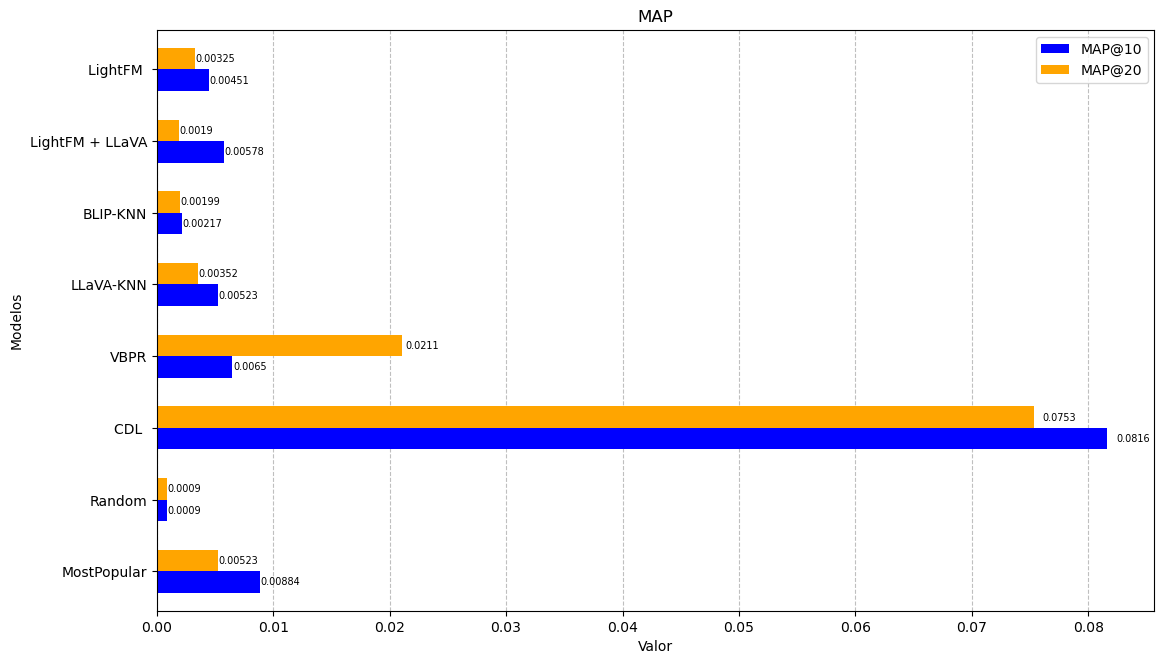

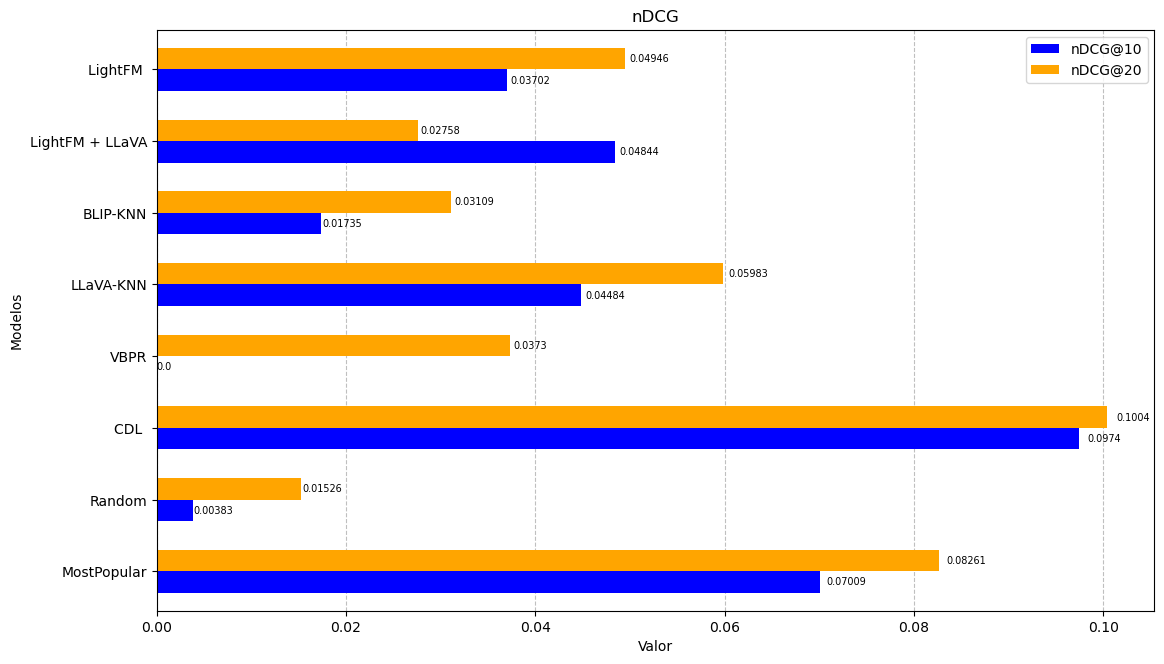

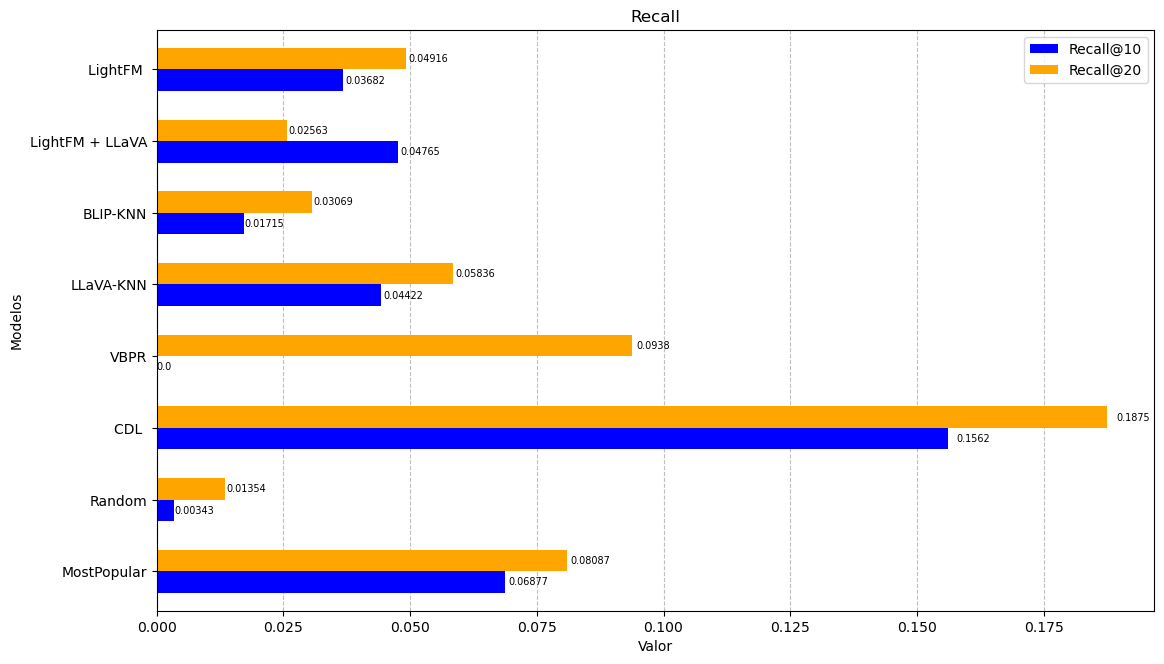

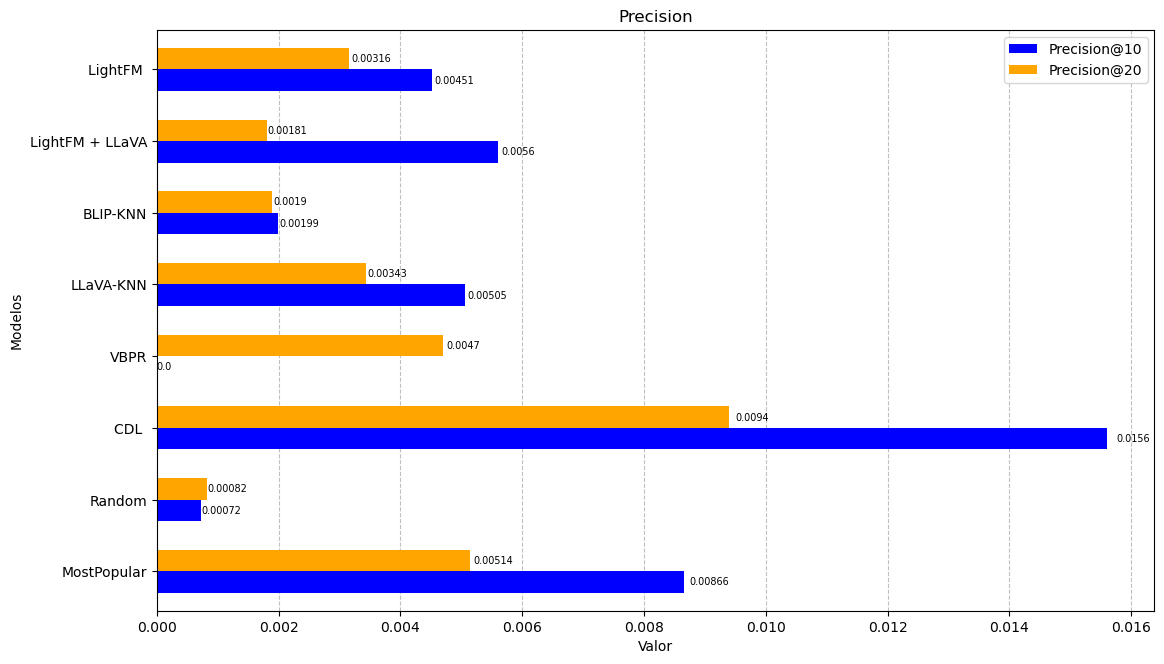

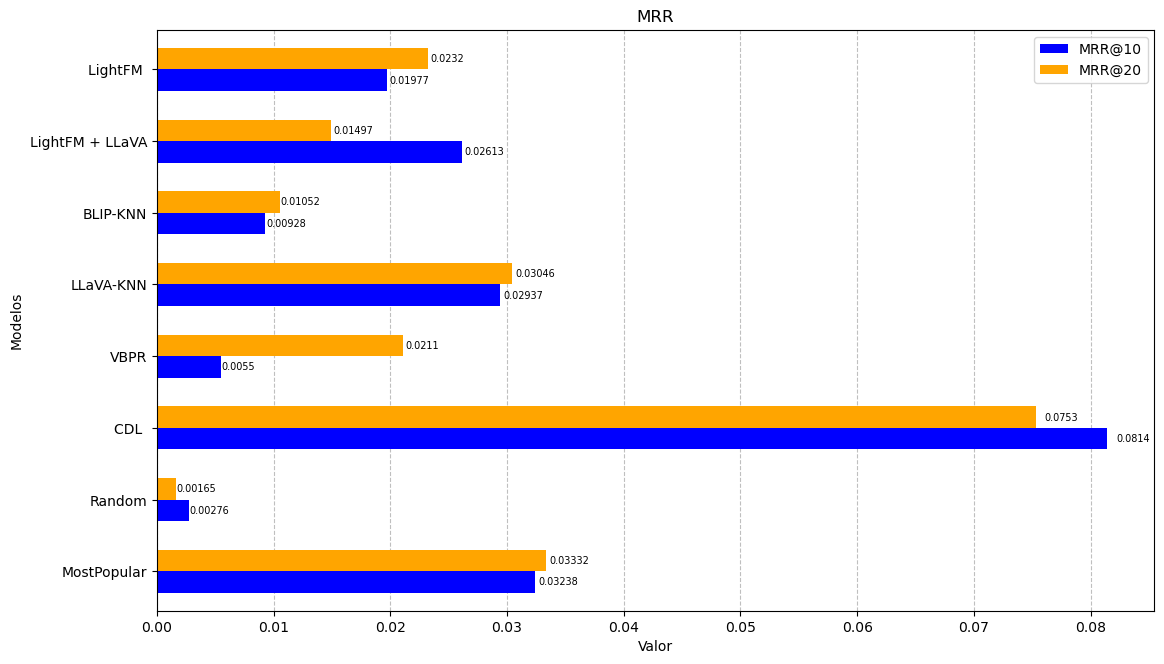

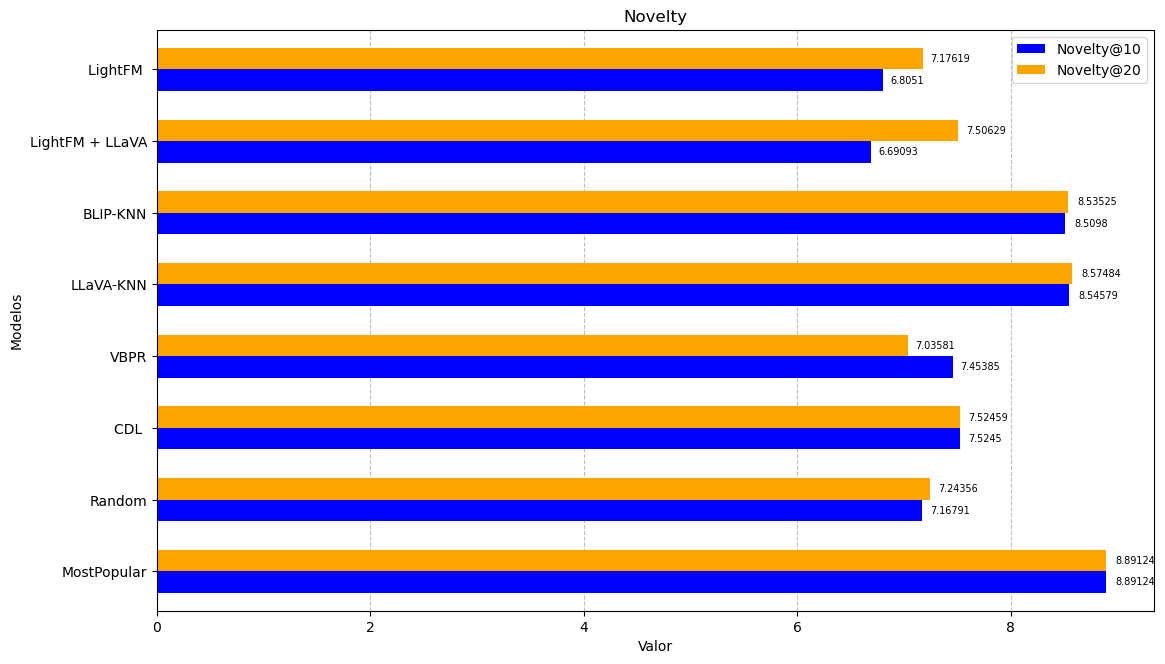

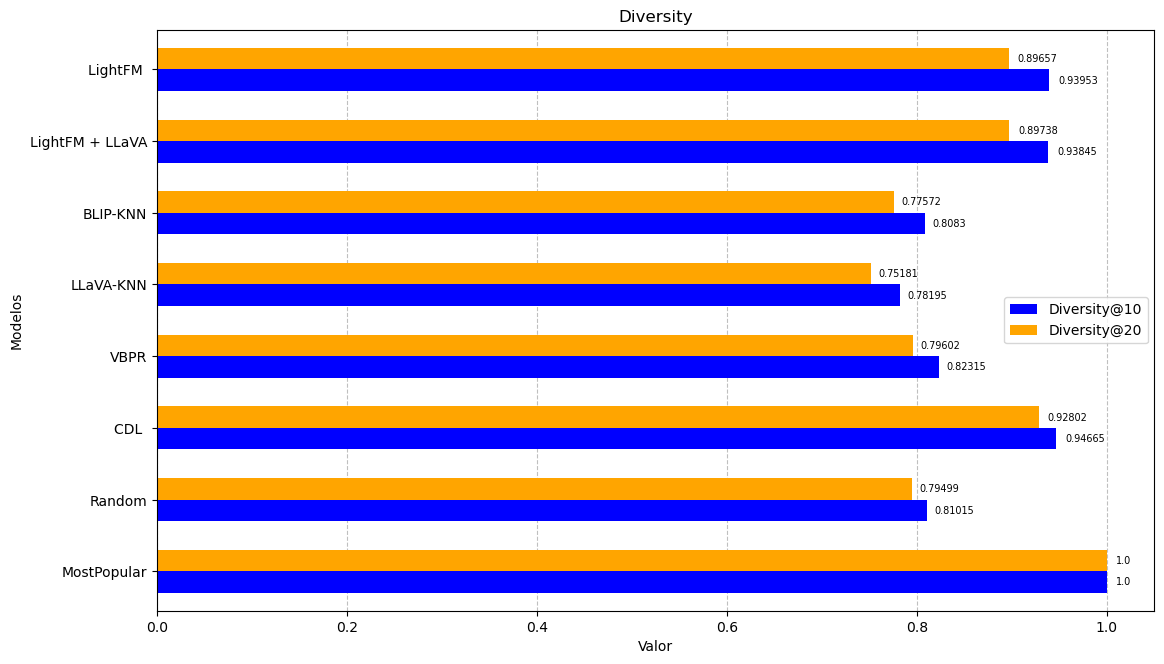

In [10]:
for metric in METRICS_NAMES:
    plot_stacked_bars(metric)